Reference =

https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/

**Import the Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

# Fetch the Data

In [0]:
df = pdr.get_data_yahoo('SPY', '2015-01-01', '2020-01-01')
df = df.dropna()
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993
2015-01-05,204.169998,204.369995,201.350006,201.720001
2015-01-06,202.089996,202.720001,198.860001,199.820007
2015-01-07,201.419998,202.720001,200.880005,202.309998
2015-01-08,204.009995,206.160004,203.990005,205.899994


# Define Predictor Variable & Target Variables

In [0]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2015-01-02,0.950012,2.700012
2015-01-05,2.449997,3.019989
2015-01-06,2.269989,3.860001
2015-01-07,-0.889999,1.839996
2015-01-08,-1.889999,2.169998


In [0]:
Y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

# Split the Dataset & Instantiate KNN Model

Now, we will split the dataset into training dataset and test dataset. We will use 70% of our data to train and the rest 30% to test. To do this, we will create a split parameter which will divide the dataframe in a 70-30 ratio. You can change the split percentage as per choice, but it is advisable to give at least 60% data as train data for good results

In [0]:
split_percentage = 0.7
split = int(split_percentage*len(df))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

In [0]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.54


# Create trading strategy using the model

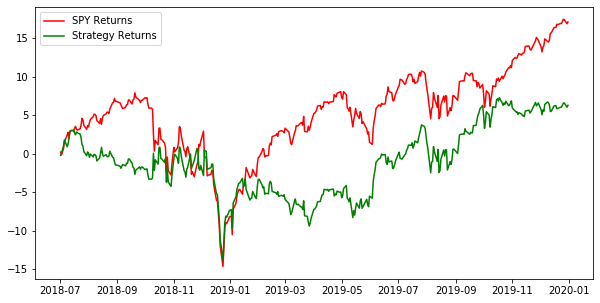

In [0]:
df['Predicted_Signal'] = knn.predict(X)
df['SPY_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_Returns = df[split:]['SPY_Returns'].cumsum()*100
df['Strategy_Returns'] = df['SPY_Returns'] * df['Predicted_Signal'].shift(1)
cum_Strategy_Returns = df[split:]['Strategy_Returns'].cumsum()*100
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns, color='r', label="SPY Returns")
plt.plot(cum_Strategy_Returns, color='g', label='Strategy Returns')
plt.legend()
plt.show()

# Sharpe Ratio

In [0]:
Std = cum_Strategy_Returns.std()
Sharpe = (cum_Strategy_Returns-Cumulative_SPY_Returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe)

Sharpe ratio: -1.42
